In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength                                             10.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             30.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             50.0    \
iobs                                                            
0           [4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...   
1           [1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...   

wavelength                                             70.0    \
iobs                                                            
0           [9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...   
1           [8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...   

wavelength                                             90.0    \
iobs                                                            
0           [8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...   
1           [8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...   

wavelength                                             110.0   \
iobs                                                            
0           [0.00028939, 0.00085966, 0.00025527, 0.0001117...   
1           [0.00029871, 0.00092469, 0.0002547, 0.0001111,...   

wavelength                                             130.0   \
iobs                                                            
0           [0.00060159, 0.0015886, 0.0007023, 0.0002723, ...   
1           [0.00058962, 0.0018025, 0.00070055, 0.00027331...   

wavelength                                             150.0   \
iobs                                                            
0           [0.00079509, 0.0030784, 0.00080502, 0.00050972...   
1           [0.00078938, 0.0032975, 0.00080607, 0.00048103...   

wavelength                                             170.0   \
iobs                                                            
0           [0.0008913, 0.00566, 0.0013939, 0.00056179, 0....   
1           [0.00088974, 0.0060483, 0.0013921, 0.00056177,...   

wavelength                                             190.0   ...  \
iobs                                                           ...   
0           [0.0008789, 0.0050446, 0.0013068, 0.00060908, ...  ...   
1           [0.00087734, 0.0050459, 0.0011036, 0.00063516,...  ...   

wavelength                                             9810.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9830.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9850.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9870.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9890.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9910.0  \


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


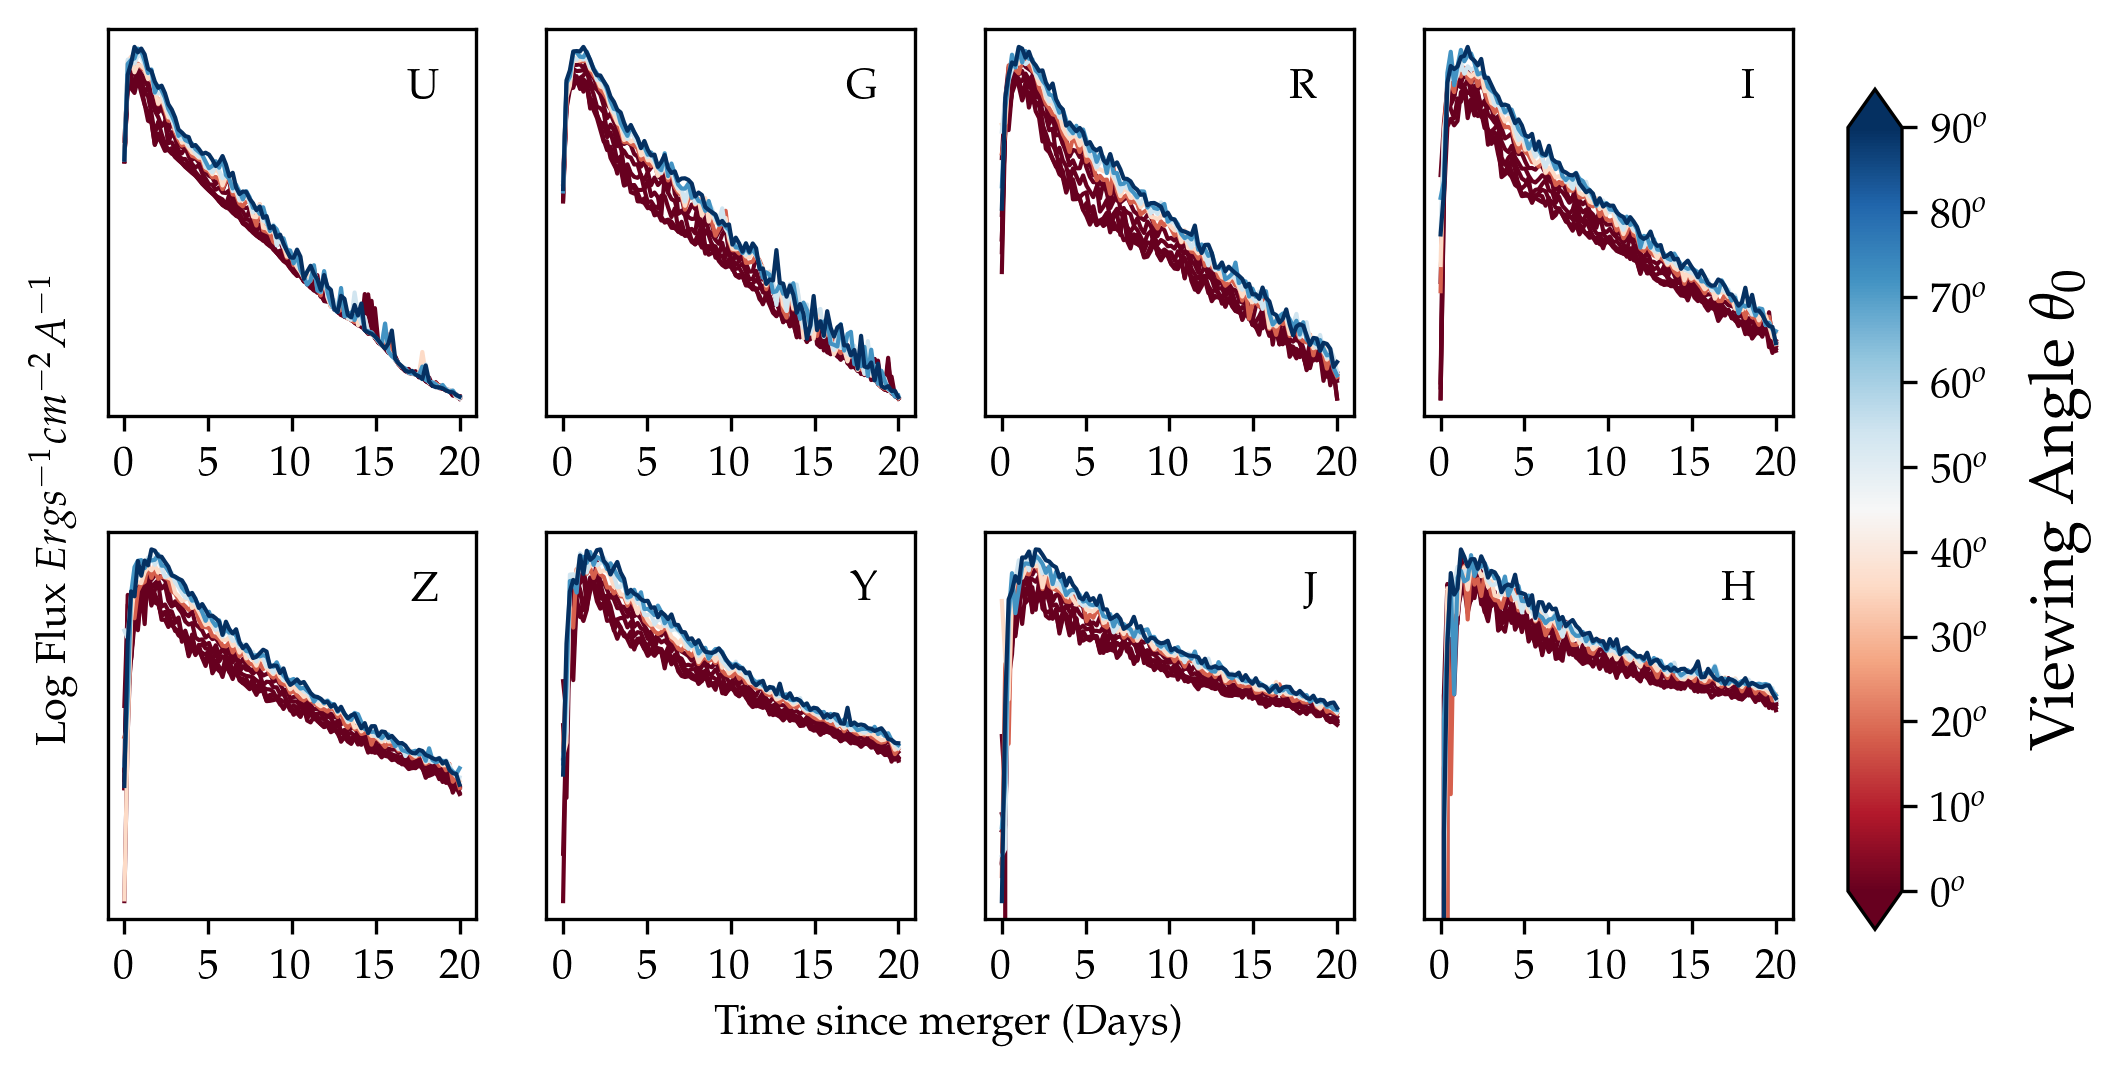

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range)
data.plot_viewingangle()

In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [15]
mejdyn_range = [0.01]
mejwind_range = [0.05]
wv = 1500
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs             0         1         2         3         4         5   \
time_step                                                               
5          0.000109  0.000227  0.000183  0.000473  0.001095  0.000828   

iobs             6         7         8         9         10  
time_step                                                    
5          0.001256  0.000556  0.001347  0.000678  0.001556

In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()


Name : GP regression
Objective : 10.659139045542842
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |  0.38781063166209034  |      +ve      |        
  rbf.lengthscale          |    4.678911133662112  |      +ve      |        
  Gaussian_noise.variance  |   0.2657633178090892  |      +ve      |        


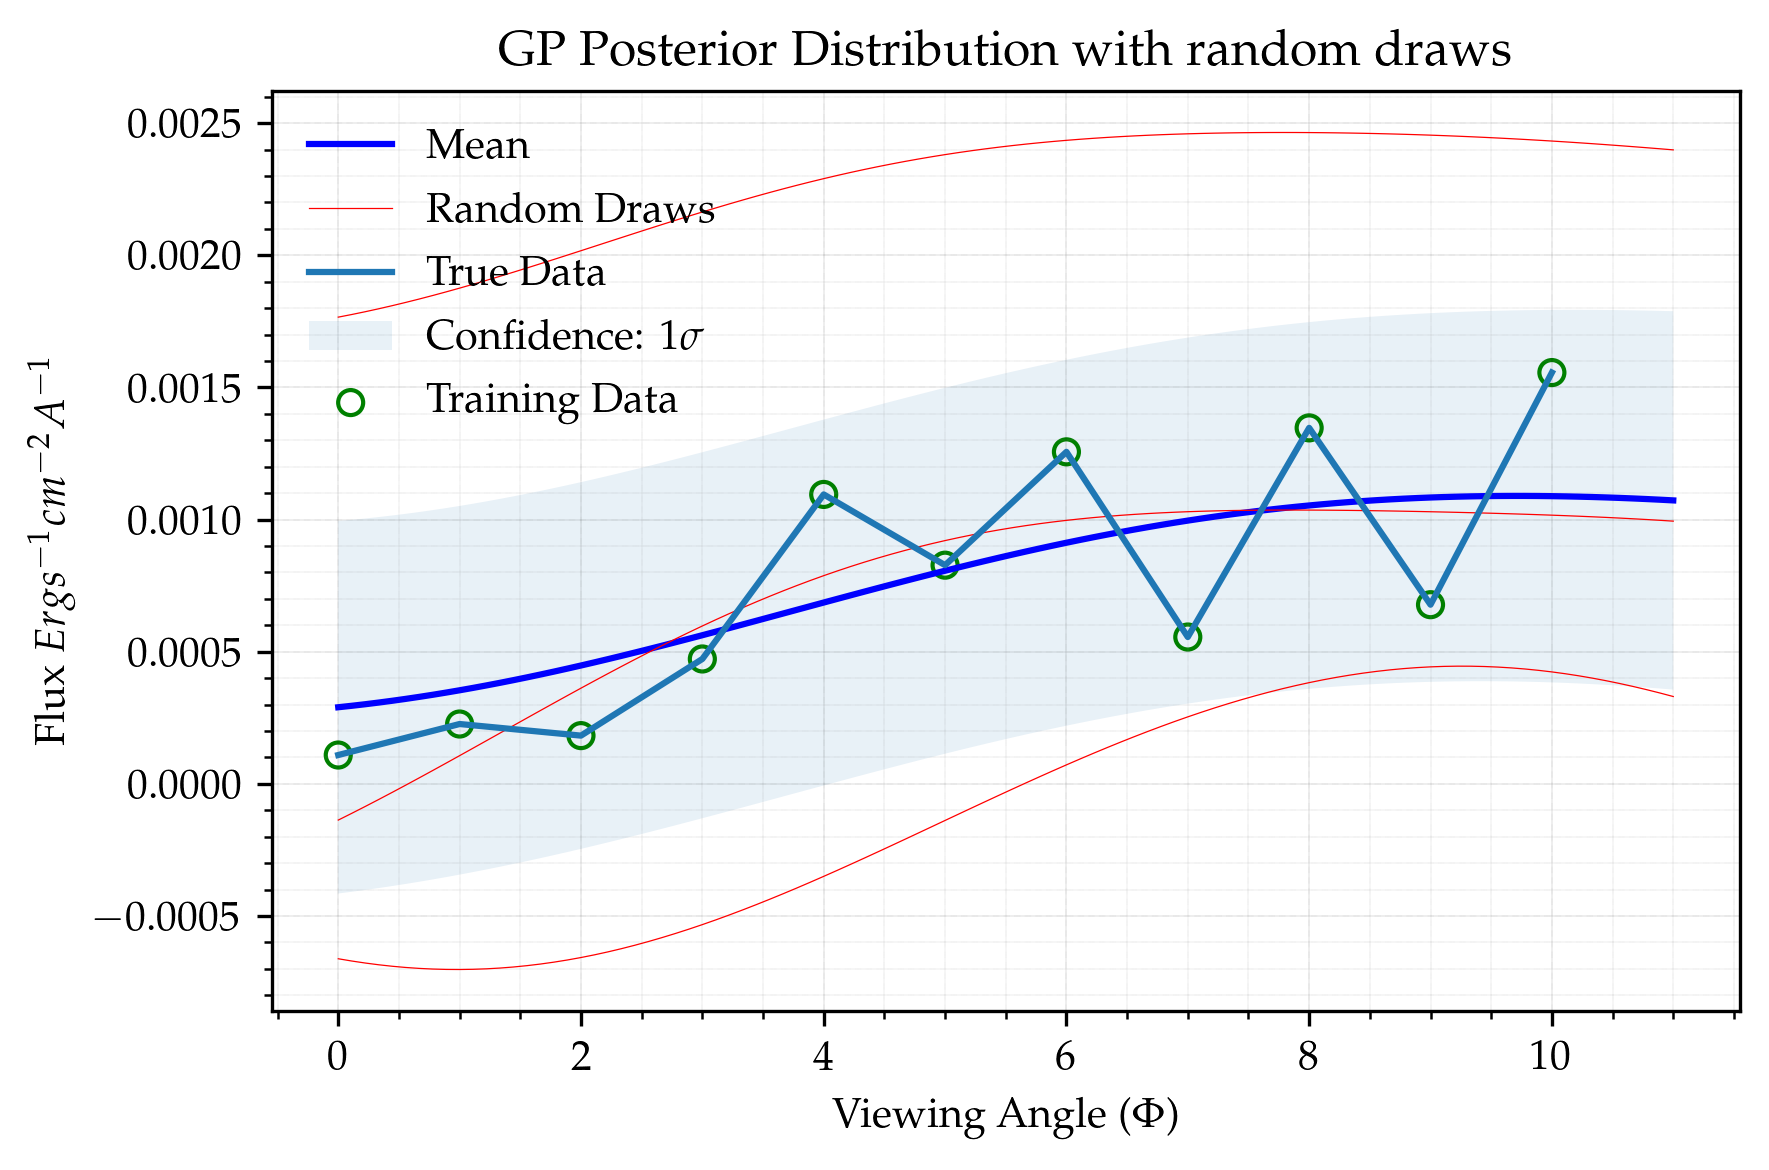

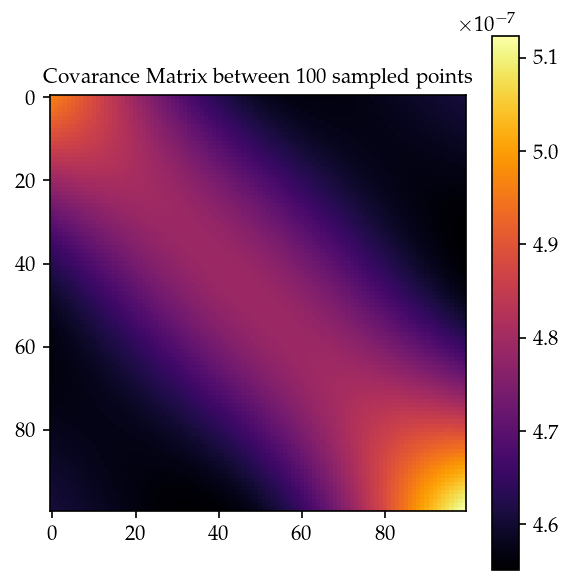

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = False)
plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

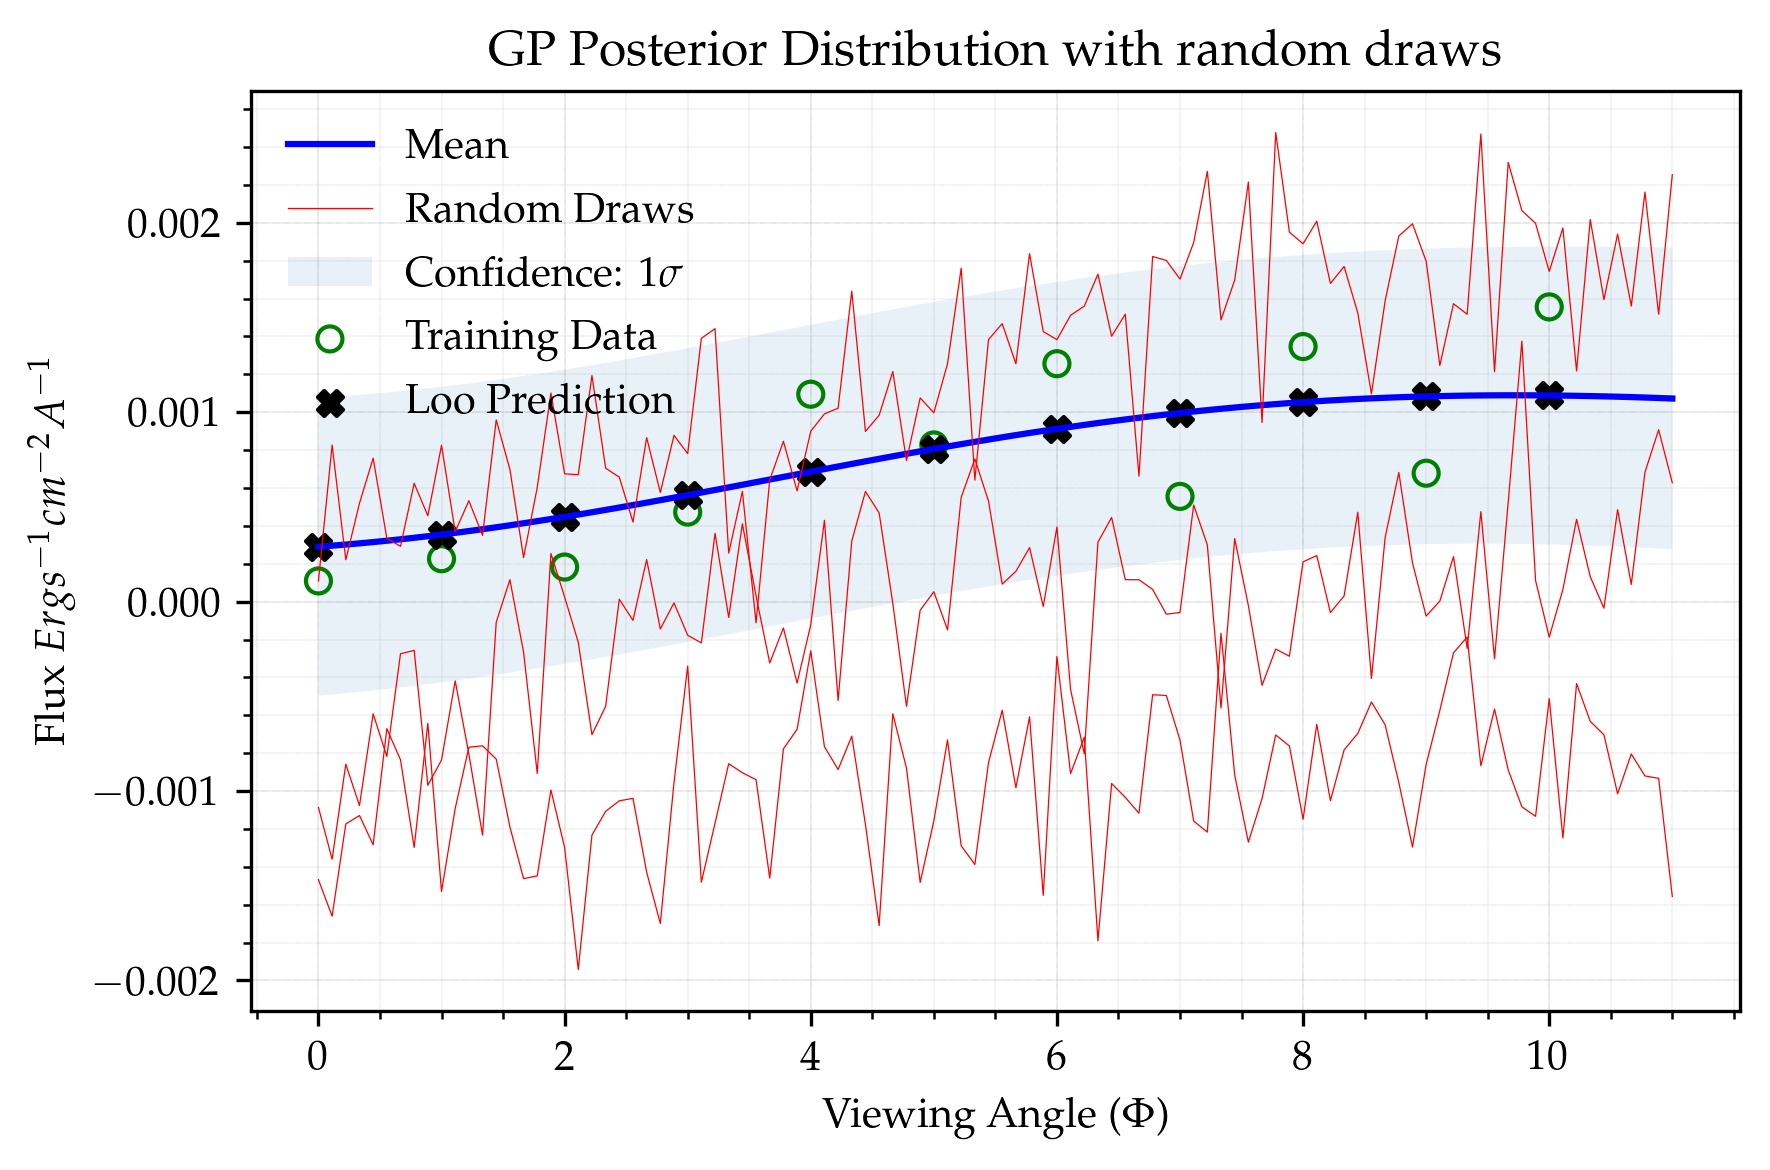

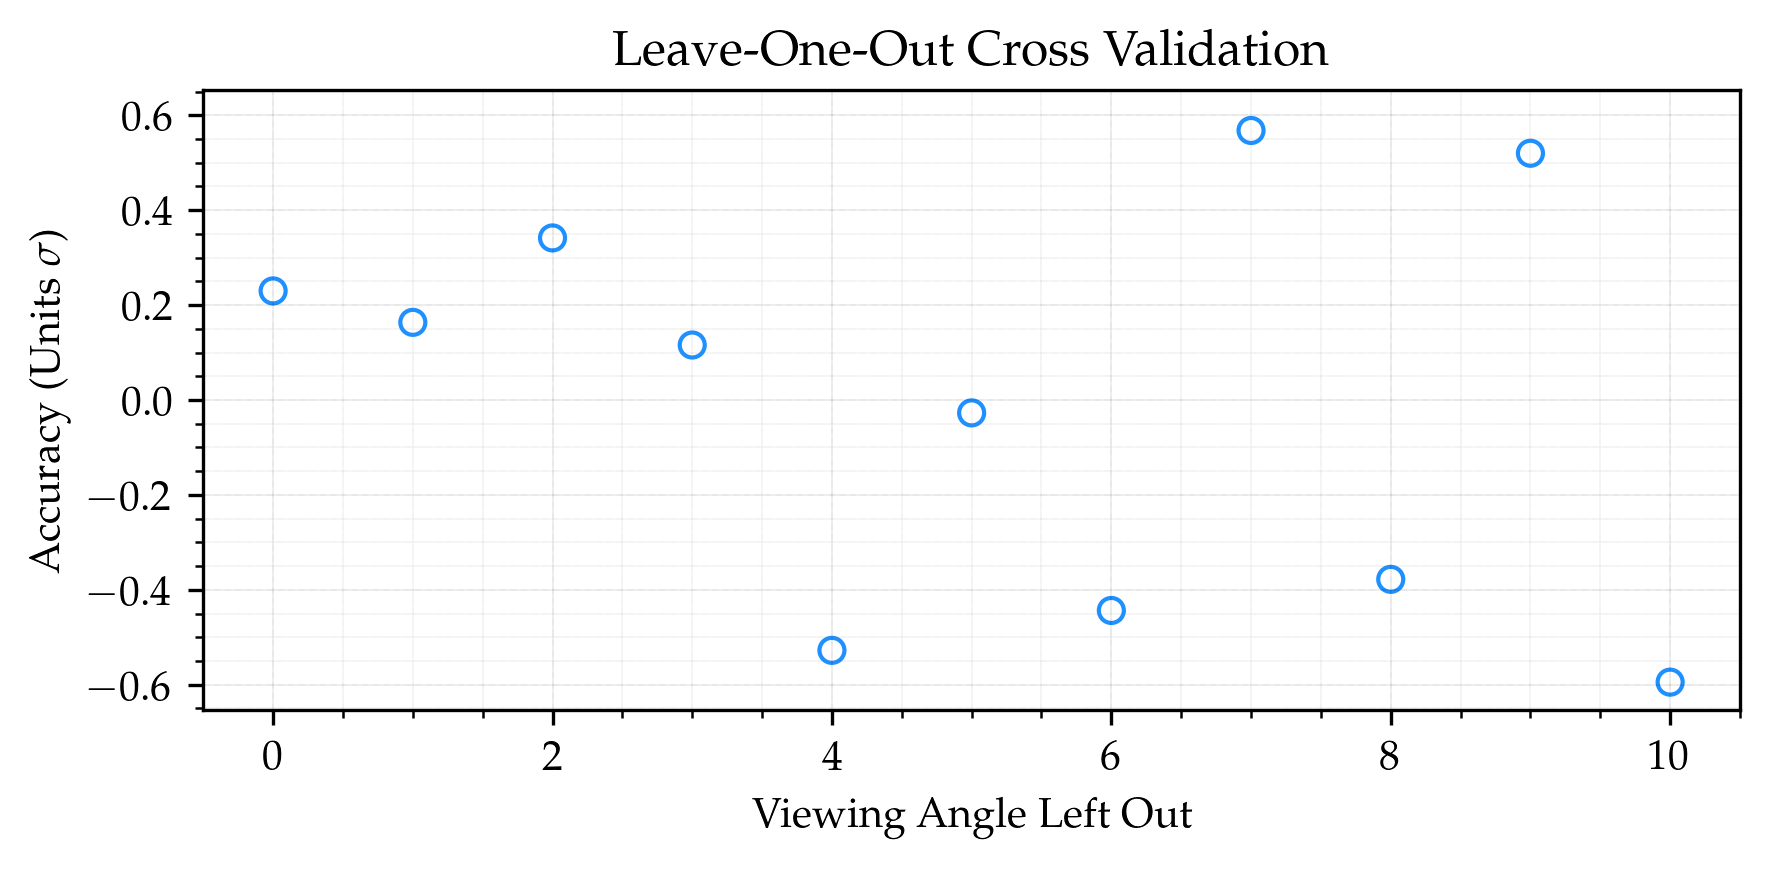

In [14]:
gp.LOOCV()
gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
gp0 = GP("reference.csv")
gp0.multiple_LOOCV(N = 3, verbose = True)
gp0.loo_list_multiple.shape

100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


(3, 11)

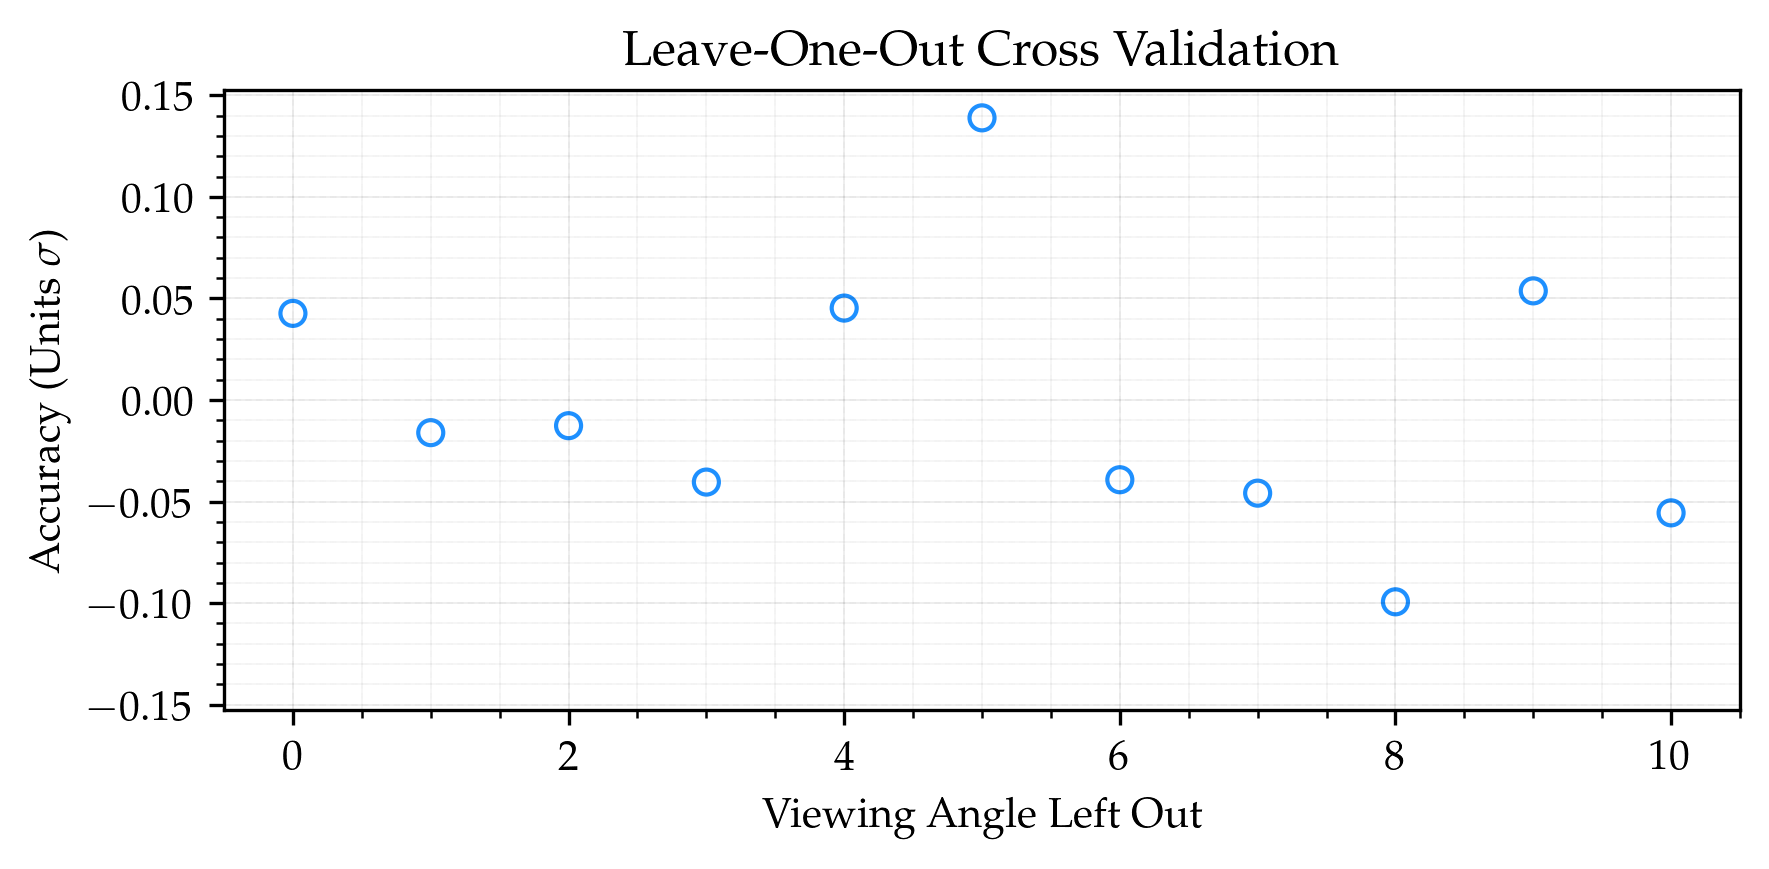

In [16]:
gp0.plot_loocv(plot_type = "multiple")

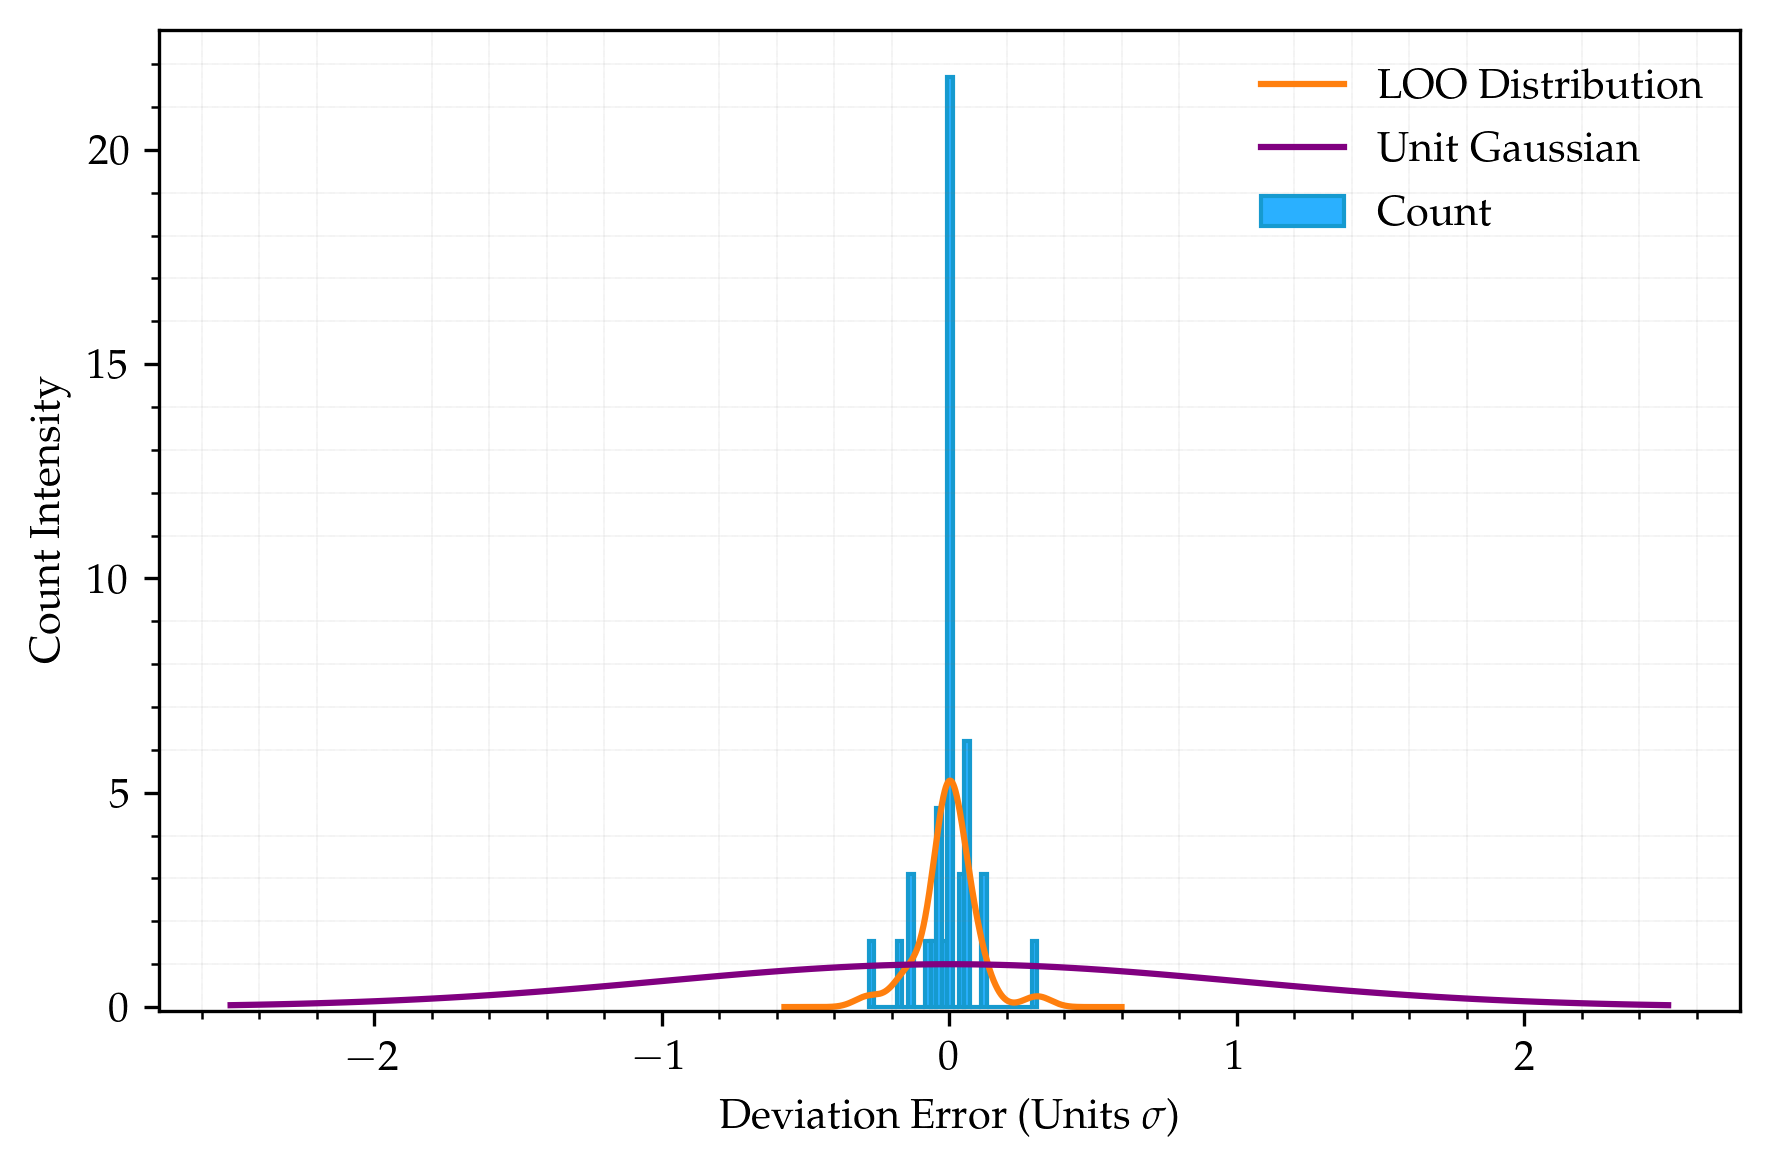

In [17]:
gp0.plot_loocv_histogram()

# Multi-Dimensional Gaussian Process

In [18]:
gp = GP2D("reference.csv")
phi_range = [45]
mejwind_range = []
mejdyn_range = [0.01]
wv_range = [900]
gp.set_selection_range(typ = "mejwind", phi_range = phi_range, 
                       mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                      wv_range = wv_range, verbose = True)
gp.log_trainingND()
gp.normalize_training2D()
# display(gp.training2D)
gp.setXY()
gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10))
gp.set_model(GPy.models.GPRegression(gp.X,gp.Y,gp.kernel))
gp.model_train(verbose = True)
gp.model_predict(N = 20, make_cov = True, include_like = True)
gp.unnormalize_training2D()

100%|██████████| 7/7 [00:04<00:00,  1.72it/s]



Name : GP regression
Objective : -111.42332471903896
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    229.29336807023586  |      +ve      |        
  rbf.lengthscale          |     25.57407300859279  |      +ve      |        
  Gaussian_noise.variance  |  0.001944632199005111  |      +ve      |        


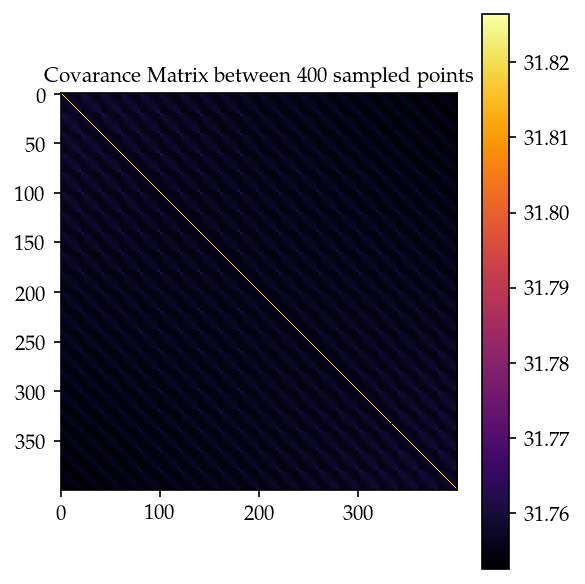

In [19]:
gp.plot_covariance2D()

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


[STATUS] Plotting for: 
[STATUS] mejdyn: [0.01] 
[STATUS] mejwind: [0.09 0.01 0.03 0.11 0.05 0.13 0.07] 
[STATUS] phi: [45] 
[STATUS] viewing_angle: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
[STATUS] wavelength: 900


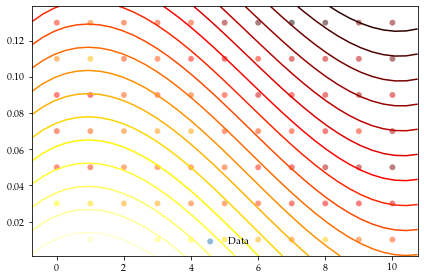

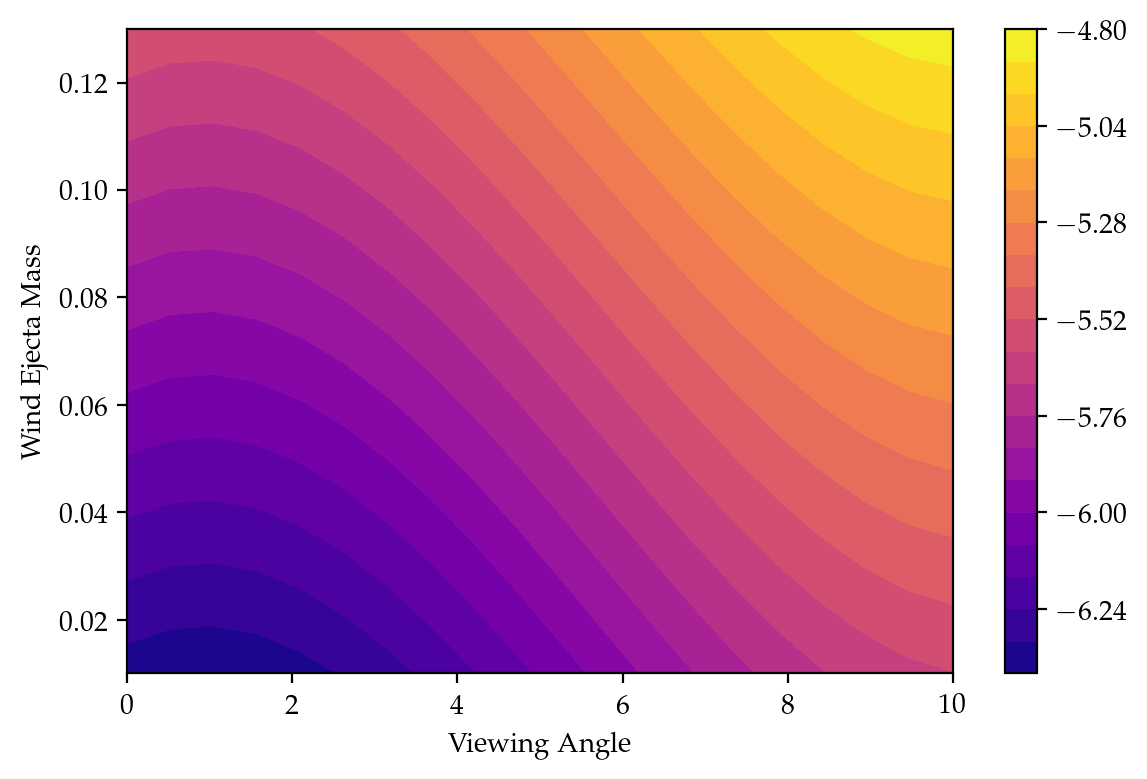

In [20]:
gp.model.plot() # GPy Plotting
gp.plot_posterior2D(verbose = True, lev = 20) # My Plotting

# 2D-LOOCV

In [21]:
gp0 = GP2D("reference.csv")
phi_range = [45]
mejwind_range = [0.03]
mejdyn_range = [0.01]
wv_range = [900]
gp0.set_selection_range(typ = "mejwind", phi_range = phi_range, 
                       mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                      wv_range = wv_range, verbose = False)
display(gp0.selected)
gp0.LOOCV_2D(verbose = True)
gp0.looList

nph  mejdyn  mejwind  phi  \
14   1000000.0    0.01     0.09   45   
38   1000000.0    0.01     0.01   45   
93   1000000.0    0.01     0.03   45   
106  1000000.0    0.01     0.11   45   
121  1000000.0    0.01     0.05   45   
147  1000000.0    0.01     0.13   45   
176  1000000.0    0.01     0.07   45   

                                          filename  
14   nph1.0e+06_mejdyn0.010_mejwind0.090_phi45.txt  
38   nph1.0e+06_mejdyn0.010_mejwind0.010_phi45.txt  
93   nph1.0e+06_mejdyn0.010_mejwind0.030_phi45.txt  
106  nph1.0e+06_mejdyn0.010_mejwind0.110_phi45.txt  
121  nph1.0e+06_mejdyn0.010_mejwind0.050_phi45.txt  
147  nph1.0e+06_mejdyn0.010_mejwind0.130_phi45.txt  
176  nph1.0e+06_mejdyn0.010_mejwind0.070_phi45.txt

100%|██████████| 77/77 [00:00<00:00, 158.33it/s]


array([ -46.98682755,  -59.00080398,   22.47681449,    0.77918332,
         34.25517124,  -18.14730415, -115.58708075,  -41.85395855,
        -92.44946168, -181.87166674, -112.38796846,  192.15170626,
        176.87703495,  190.87505104,  158.64626355,  142.04381447,
        117.63143434,   92.37235657,   64.28971179,  110.23373417,
         39.42094189,   15.70597331,  135.77851383,  115.38764553,
         86.51975319,   87.74686642,   40.03934935,   36.54327696,
          3.2423025 ,  -39.30124123,  -58.20203646,  -54.73083461,
        -84.67562496,   63.38063172,   97.75512901,    7.84169264,
         20.393233  ,  -41.40381687, -108.38360396,  -33.19503213,
       -131.8864824 , -118.95449933, -148.30617028, -273.52430506,
         -9.45605737,   -4.9351069 ,   38.43605808,   37.50174015,
         33.73735804,   20.00152352,  -26.93794379,  -84.24077716,
       -153.66377123, -153.08916363, -235.33196246,  -26.08448933,
         55.07875879,   12.61634678,    5.59078484,    9.50462

In [22]:
gp = GP2D("reference.csv")
self = gp

self.loo_list_multiple = []

typ = "mejwind"
verbose = True

if typ == "mejwind":
    a = gp0.reference.phi.unique()
    b = gp0.reference.mejdyn.unique()


from itertools import product

curr_pair = list(product(a, b))
wv_range = [900]

for i in tqdm(range(len(curr_pair)), disable = not verbose):
    
    if typ == "mejwind":
        phi_range = [curr_pair[i][0]]
        mejwind_range = self.selected.mejwind.unique()
        mejdyn_range = [curr_pair[i][1]]
    
    
    try:      
        self.set_selection_range(typ = typ, phi_range = phi_range, 
                               mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                              wv_range = wv_range, verbose = False)
    
    except:
        print(f"Skipped: phi_range:{gp.phi_range}, mejwind_range:{gp.mejwind_range}, mejdyn_range: {gp.mejdyn_range}, wv_range:{wv_range}")
        self.selected = self.reference
        continue
    
    self.LOOCV_2D(verbose = False)
    self.loo_list_multiple.append(self.looList)
    self.selected = self.reference

 14%|█▍        | 4/28 [00:18<01:52,  4.67s/it] /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
 61%|██████    | 17/28 [01:15<00:39,  3.58s/it]

Skipped: phi_range:[0], mejwind_range:[0.05], mejdyn_range: [0.001], wv_range:[900]


 64%|██████▍   | 18/28 [01:17<00:28,  2.83s/it]

Skipped: phi_range:[0], mejwind_range:[0.07], mejdyn_range: [0.01], wv_range:[900]


 68%|██████▊   | 19/28 [01:18<00:20,  2.29s/it]

Skipped: phi_range:[0], mejwind_range:[0.03], mejdyn_range: [0.005], wv_range:[900]


 71%|███████▏  | 20/28 [01:19<00:15,  1.92s/it]

Skipped: phi_range:[0], mejwind_range:[0.01], mejdyn_range: [0.02], wv_range:[900]


 75%|███████▌  | 21/28 [01:20<00:11,  1.69s/it]

Skipped: phi_range:[90], mejwind_range:[0.03], mejdyn_range: [0.001], wv_range:[900]


 79%|███████▊  | 22/28 [01:21<00:09,  1.52s/it]

Skipped: phi_range:[90], mejwind_range:[0.05], mejdyn_range: [0.01], wv_range:[900]


 82%|████████▏ | 23/28 [01:22<00:07,  1.41s/it]

Skipped: phi_range:[90], mejwind_range:[0.03], mejdyn_range: [0.005], wv_range:[900]


 86%|████████▌ | 24/28 [01:23<00:05,  1.33s/it]

Skipped: phi_range:[90], mejwind_range:[0.13], mejdyn_range: [0.02], wv_range:[900]


100%|██████████| 28/28 [01:41<00:00,  3.63s/it]


(20, 77)


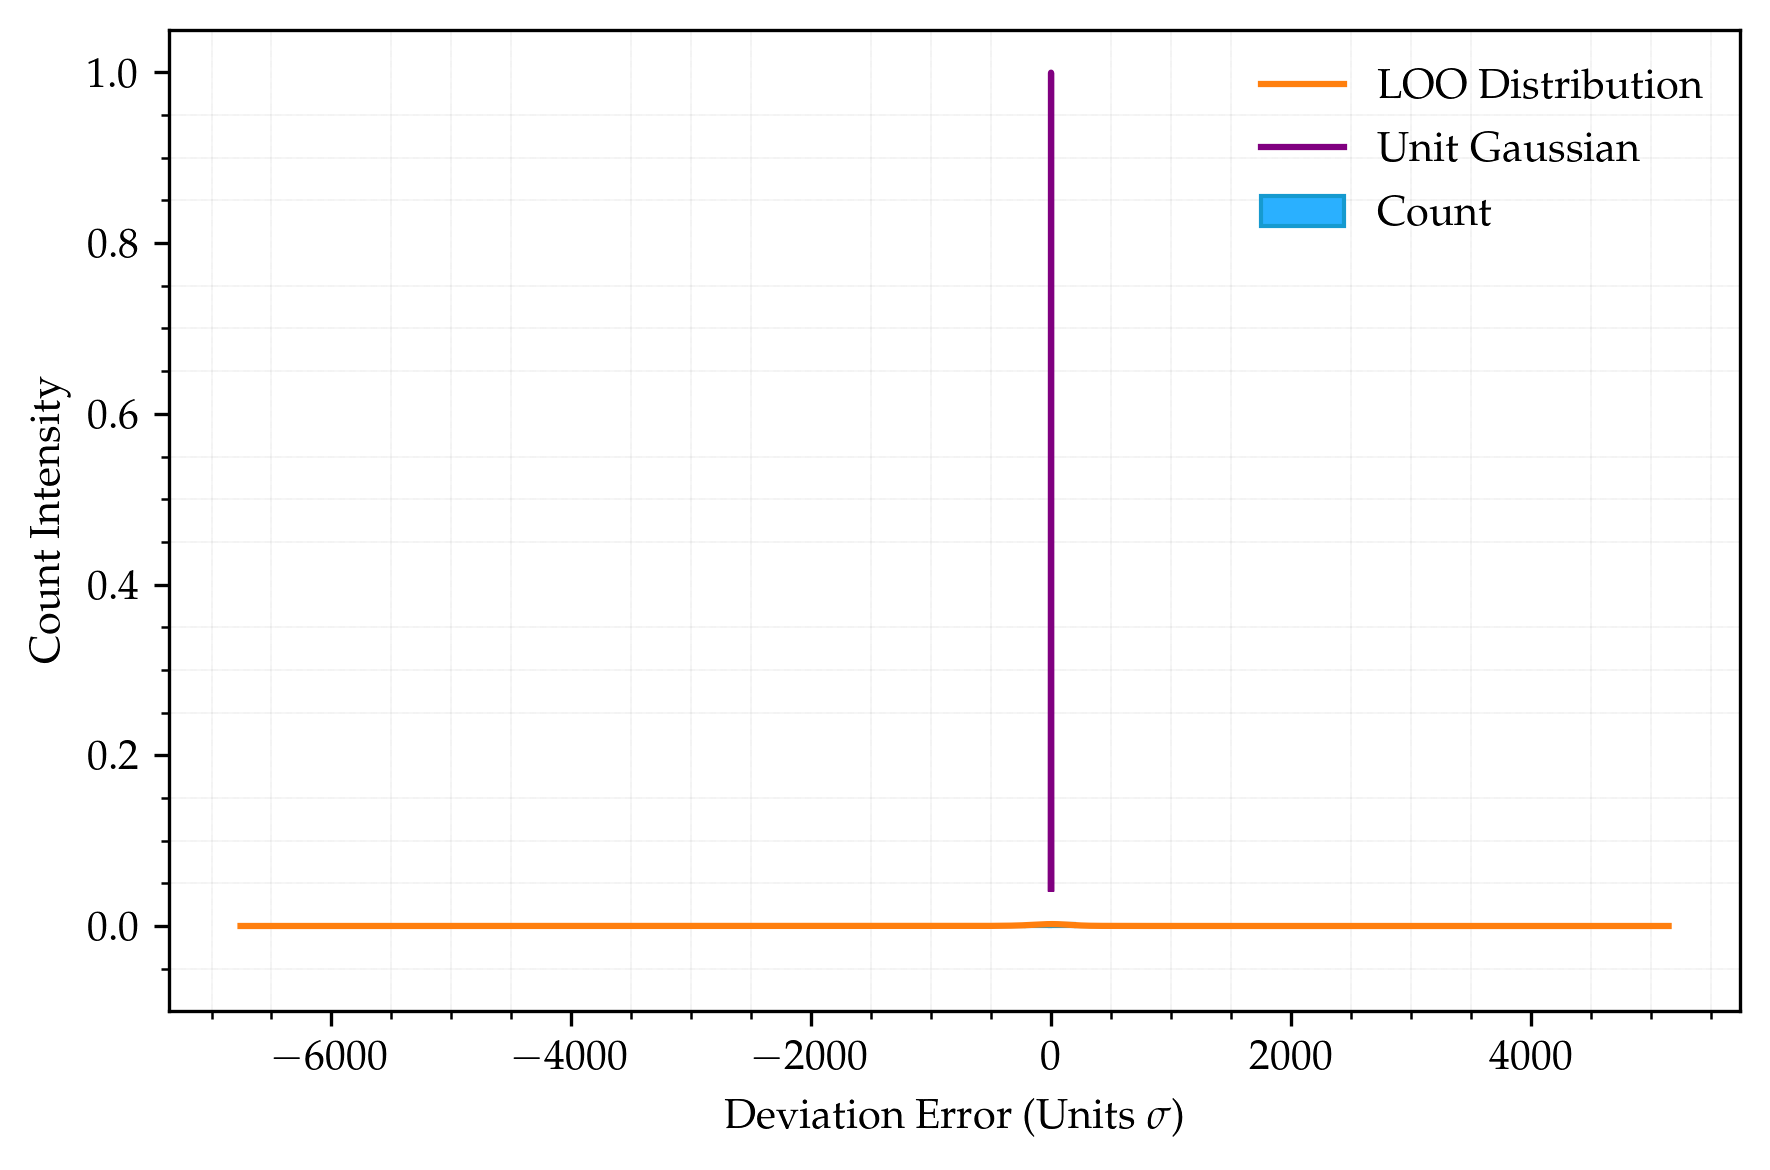

In [23]:
self.loo_list_multiple = np.array(self.loo_list_multiple, dtype = float)
print(self.loo_list_multiple.shape)
self.plot_loocv_histogram()

In [24]:
gp = GP2D("reference.csv")
typ = "mejwind"
gp.phi_range = [45]
gp.mejdyn_range = [0.01]
gp.wv_range = [900]
gp.multiple_LOOCV_2D()